# Generate Data
First, we will show you how we generated the data

In [1]:
import numpy as np

# data generation
def create_data(filename, w, b, N):
    x = np.random.rand(w.shape[1], N) * 100
    y = np.dot(w, x) + b + np.random.normal(0, 2, N)
    result = np.transpose(np.vstack((x, y)))
    np.savetxt(filename, result, fmt='%.5f',
               header="x1,x2,x3,x4,y", delimiter=',')

In [2]:
# Setup parameters and generate data
wtarget = np.array([[-6, 4, -2, 4]])
btarget = 2
N = 1000
create_data("data.txt", wtarget, btarget, N)

## Actual SGD implementation.

First, we set up our data.

In [3]:
# load data
a = np.loadtxt("hw1ds1.txt", delimiter=",", skiprows=1)
N, D = a.shape
y = a[:, D - 1]
x = a[:, :D - 1]

# add ones vector
x = np.hstack((x, np.ones((N, 1))))

# Initialize constants
epsilon = .0001

Function to calculate error

In [4]:
def modelerror(w, x, y):
    diff = y - x.dot(w)
    error = np.sum(diff ** 2)
    return error

SGD loop

In [5]:
def SGD(X, Y, nu, epsilon, epoch=1000, verbose=True):
    # initialize weight vector
    w = np.full(X[0].shape,0.001)

    # get initial error
    error = modelerror(w, X, Y)
    print ("Starting SGD with nu = {}, epsilon = {}, initial error: {}".format(nu, epsilon, error))
    firstchange = 0

    order = []
    errors = []
    for i in range(0, 10000000):
        # permute order
        if i % N == 0:
            order = np.random.permutation(N)
        j = order[i % N]
        
        # calculate gradient
        loss = Y[j] - X[j].dot(w)
        dw = -2 * loss * X[j]
        
        # update step
        w = w - dw  * nu
        # Check every epoch
        if i % epoch == epoch-1:
            olderror = error
            error = modelerror(w, X, Y)
            errors.append(error)
            derror = abs(error - olderror)
            if not firstchange:
                firstchange = derror
                print "First change in error:", firstchange
            if verbose:
                print i + 1, error
                print w
            if derror/firstchange < epsilon:
                print "SGD complete in {} epochs. Final error: {}".format(len(errors),error)
                return w, errors

In [6]:
# Run SGD with epsilon = 0.0001, eta = e^-15
W, errors = SGD(x, y, np.exp(-15), epsilon, epoch=1000)

Starting SGD with nu = 3.05902320502e-07, epsilon = 0.0001, initial error: 2961443551.63
First change in error: 2210285329.21
1000 751158222.419
[-3.24938134  0.84608044 -5.79666008  3.18054826 -0.01819706]
2000 282115458.971
[-4.37869981  1.9500867  -8.27102098  5.41931704 -0.02180756]
3000 100949814.561
[-5.00756564  2.76280889 -9.72269584  6.91025014 -0.02115744]
4000 37900623.3331
[ -5.37453528   3.25300097 -10.57634331   7.76000363  -0.02074211]
5000 13632440.988
[ -5.61019276   3.51994306 -11.16091755   8.26717304  -0.02119739]
6000 5116863.10355
[ -5.76286452   3.71915109 -11.48682867   8.54501099  -0.02123268]
7000 1885182.84688
[ -5.86429341   3.83534335 -11.68463628   8.72697562  -0.02120249]
8000 681534.883298
[ -5.92550025   3.90506969 -11.81272803   8.83645652  -0.02121305]
9000 282299.158942
[ -5.96071879   3.94319164 -11.88497907   8.8965337   -0.02126594]
10000 122038.452055
[ -5.97564327   3.96851742 -11.93115557   8.94235337  -0.02121641]
SGD complete in 10 epochs. Fi

Starting SGD with nu = 1.52299797447e-08, epsilon = 0.0001, initial error: 2961443551.63
First change in error: 478094665.2
SGD complete in 155 epochs. Final error: 887595.472694
Starting SGD with nu = 4.13993771879e-08, epsilon = 0.0001, initial error: 2961443551.63
First change in error: 867825201.623
SGD complete in 60 epochs. Final error: 601213.480579
Starting SGD with nu = 1.12535174719e-07, epsilon = 0.0001, initial error: 2961443551.63
First change in error: 1378388062.75
SGD complete in 24 epochs. Final error: 313551.319929
Starting SGD with nu = 3.05902320502e-07, epsilon = 0.0001, initial error: 2961443551.63
First change in error: 2072079163.54
SGD complete in 10 epochs. Final error: 125568.899584
Starting SGD with nu = 8.31528719104e-07, epsilon = 0.0001, initial error: 2961443551.63
First change in error: 2831938625.39
SGD complete in 5 epochs. Final error: 41780.5064043
Starting SGD with nu = 2.26032940698e-06, epsilon = 0.0001, initial error: 2961443551.63
First change 

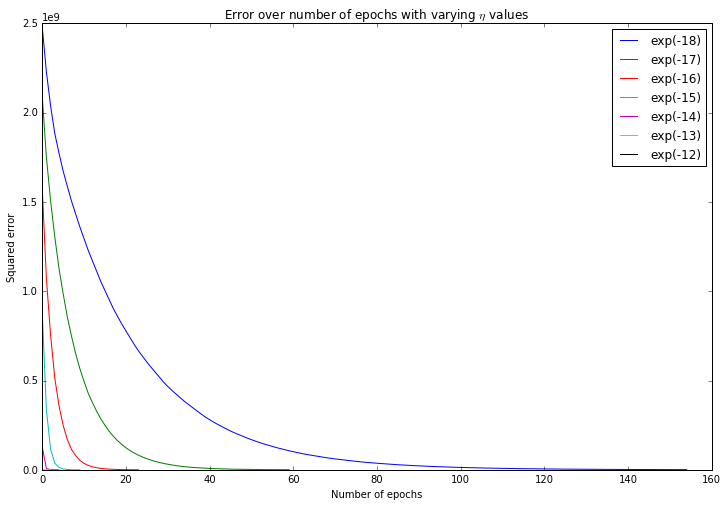

In [7]:
# Plot SGD trials over multiple eta values
%matplotlib inline
import matplotlib.pyplot as plt
# make graphs bigger!
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.figure()
for i in np.arange(-18,-11):
    W, errors = SGD(x, y, np.exp(i), epsilon, verbose=False)
    plt.plot(errors, label='exp(' + str(i) + ')')
    
# plt.gca().set_yscale('log')
plt.legend()
plt.title(r'Error over number of epochs with varying $\eta$ values')
plt.xlabel('Number of epochs')
plt.ylabel('Squared error')
plt.show()

# Analytical OLS

In [8]:
def OLS(X, Y):
    """Implements ordinary least squares estimation for linear regression"""
    Xt = np.transpose(X)
    return np.linalg.inv(Xt.dot(X)).dot(Xt.dot(Y))

In [9]:
wols = OLS(x, y)
optimal = modelerror(wols, x, y)
print optimal
print wols

39684.7966258
[ -5.99939736   3.9996877  -12.00124107   9.00040567   0.01812267]
